<a href="https://colab.research.google.com/github/scionrails/ai-ymp-2022/blob/main/dnn/1_MNIST_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#딥러닝을 이용한 이미지 분류

MNIST 수기 숫자 이미지 인식하기

In [2]:
from tensorflow.keras.datasets import mnist

데이터 불러오기


In [3]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_valid.shape

(10000, 28, 28)

In [ ]:
x_train.dtype

In [7]:
x_train.min()

0

In [8]:
x_train.max()

255

In [ ]:
x_train[0]

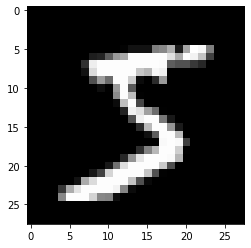

In [4]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

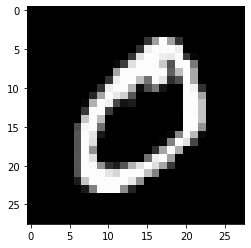

In [6]:
plt.imshow(x_train[1], cmap='gray')

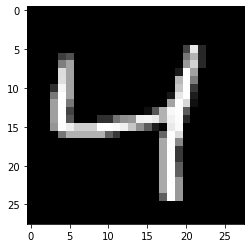

In [9]:
plt.imshow(x_train[2], cmap='gray')

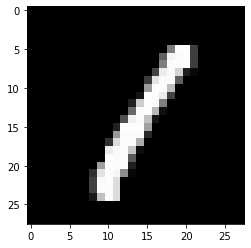

In [10]:
plt.imshow(x_train[3], cmap='gray')

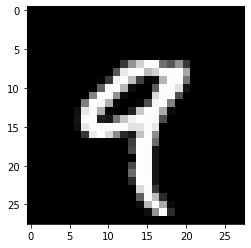

In [11]:
plt.imshow(x_train[4], cmap='gray')

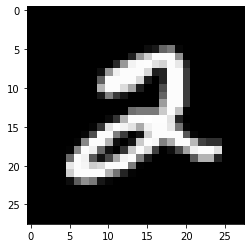

In [8]:
plt.imshow(x_train[5], cmap='gray')

In [14]:
y_train[0:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [24]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [25]:
x_train.shape

(60000, 784)

In [26]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
x_train = x_train / 255
x_valid = x_valid / 255 

In [16]:
x_train.dtype

dtype('float64')

In [17]:
x_train.min()

0.0

In [18]:
x_train.max()

1.0

In [19]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [20]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [22]:
from tensorflow.keras.layers import Dense

In [23]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

In [27]:
model.add(Dense(units = 512, activation='relu'))

In [28]:
model.add(Dense(units = 10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1933 - accuracy: 0.9421 - val_loss: 0.0947 - val_accuracy: 0.9738
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1010 - accuracy: 0.9737 - val_loss: 0.1027 - val_accuracy: 0.9761
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0847 - accuracy: 0.9797 - val_loss: 0.1224 - val_accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0743 - accuracy: 0.9833 - val_loss: 0.1577 - val_accuracy: 0.9697
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0662 - accuracy: 0.9860 - val_loss: 0.1784 - val_accuracy: 0.9699


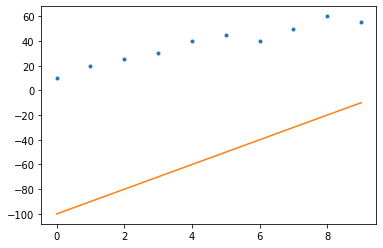

Loss: 8767.5


In [35]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

m = -10  # -10 to start, change me please
b = 100  # 100 to start, change me please

# Sample data
x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])
y_hat = x * m + b

plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

print("Loss:", np.sum((y - y_hat)**2)/len(x))